In [1]:
import tensorflow as tf
import numpy as np
import os
import random
import cv2
import matplotlib.pyplot as plt

In [2]:
# Load the trained model
cnn_model = tf.keras.models.load_model("my_model.keras")

In [3]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,751,493 (37.20 MB)

 Trainable params: 3,250,497 (12.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,500,996 (24.80 MB)

In [4]:
# Define dataset path
dataset_path = r"C:\Users\Anura\Desktop\Innomatics_313\05. Deep Learning\Projects\CNN\Ice-Cream vs Pizza\dataset\valid"

In [5]:
# Get class labels
class_names = ["Ice Cream", "Pizza"]

In [21]:
# Randomly select a category and image
category = random.choice(os.listdir(dataset_path))  # 'pizza' or 'icecream'
image_folder = os.path.join(dataset_path, category)
random_image = random.choice(os.listdir(image_folder))
image_path = os.path.join(image_folder, random_image)

In [22]:
# Load and preprocess image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
image = cv2.resize(image, (64, 64))  # Resize for CNN input
image = image / 255.0  # Normalize
image = np.expand_dims(image, axis=0)  # Reshape for prediction

In [23]:
# Make prediction
pred = cnn_model.predict(image)
predicted_class = "Pizza" if pred > 0.5 else "Ice Cream"
actual_class = "Pizza" if category == "pizza" else "Ice Cream"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


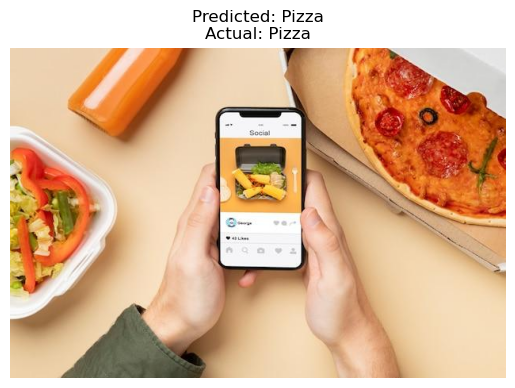

In [24]:
# Display image and results
plt.imshow(cv2.imread(image_path)[..., ::-1])  # Convert BGR to RGB for display
plt.axis("off")
plt.title(f"Predicted: {predicted_class}\nActual: {actual_class}")
plt.show()

In [25]:
# Print the result
if predicted_class == actual_class:
    print("✅ Correct Prediction!")
else:
    print("❌ Wrong Prediction.")

✅ Correct Prediction!
